In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

Using TensorFlow backend.


# Review of NN Model Evaluation

**The key measurements are very similar to evaluating Machine Learning models**
- For classification, it is accuracy
- For regression, it is MSE

**The only differences are:**
- We want to see changes in these metrics over epochs
- Draw two comparisons, one for the training data, and one for validation data
- We are also interested in seeing the loss decreasing over epochs(this is the function we are trying to minimize)

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

# Scale the data
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

# Transform outcomes to categorical form
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Create the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [3]:
model_history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 141us/step - loss: 2.2261 - acc: 0.2863 - val_loss: 1.7961 - val_acc: 0.5328
Epoch 2/10
48000/48000 [==============================] - 5s 108us/step - loss: 0.8869 - acc: 0.7499 - val_loss: 0.5031 - val_acc: 0.8585
Epoch 3/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.4587 - acc: 0.8687 - val_loss: 0.3898 - val_acc: 0.8879
Epoch 4/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.3777 - acc: 0.8931 - val_loss: 0.3339 - val_acc: 0.9034
Epoch 5/10
48000/48000 [==============================] - 6s 122us/step - loss: 0.3348 - acc: 0.9044 - val_loss: 0.2977 - val_acc: 0.9160
Epoch 6/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.3014 - acc: 0.9140 - val_loss: 0.2711 - val_acc: 0.9232
Epoch 7/10
48000/48000 [===

### Now that the model finished training:
- Let's see what available values we have in model_history
- Let's draw a couple plots to see the outcomes of the model training

In [4]:
print(f'Model History keys: {model_history.history.keys()}')

Model History keys: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


### Plot the Accuracy for training/testing

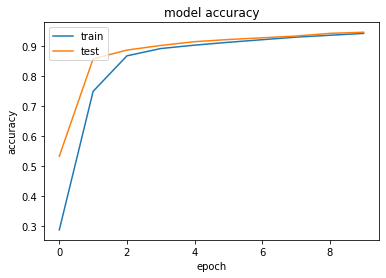

In [5]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Insights:

- We should generally see an increase in the training accuracy as we do more epochs
- We should also expect to see an increase in the testing accuracy, which should generally be lower than the train, but in this case it looks to be even higher. 

### Plot the Loss for training/testing

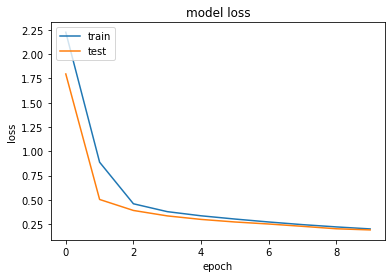

In [7]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### What to expect: 
- We should see a decline in loss as the epochs go
- We will also usually see that the test loss is generally higher than the training loss, but not in this case

## Using Tensorboards

- This is an application that lets us monitor the progress of our model as it is being trained
- Shows us essentially these graphs in real time

**For this we can utilize something called Callbacks in tensorflow**

> tensorboard --logdir Graph

In [9]:
from keras.callbacks import TensorBoard

tensor_board = TensorBoard(log_dir='./Graph')

model.fit(x_train, y_train, epochs=10, verbose=1, callbacks=[tensor_board])

Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1631 - acc: 0.9536
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1483 - acc: 0.9582
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1365 - acc: 0.9610
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1252 - acc: 0.9644
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1159 - acc: 0.9670
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1076 - acc: 0.9698
Epoch 7/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1001 - acc: 0.9718
Epoch 8/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0934 - acc: 0.9735
Epoch 9/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0870 - acc: 0.9759
Epoch 10/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0815 - a